In [ ]:
## Dataset: MovieLens 

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [382]:
dfmovies=pd.read_csv("movie.csv")
dfrating=pd.read_csv("rating.csv")
dftags = pd.read_csv('tag.csv')
dflinks = pd.read_csv('link.csv')
dfgenome_tags = pd.read_csv('genome_tags.csv')
dfgenome_scores = pd.read_csv('genome_scores.csv')

In [383]:
dfmovies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [384]:
dfrating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,4/2/2005 23:53
1,1,29,3.5,4/2/2005 23:31
2,1,32,3.5,4/2/2005 23:33
3,1,47,3.5,4/2/2005 23:32
4,1,50,3.5,4/2/2005 23:29


In [385]:
dftags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,4/24/2009 18:19
1,65,208,dark hero,5/10/2013 1:41
2,65,353,dark hero,5/10/2013 1:41
3,65,521,noir thriller,5/10/2013 1:39
4,65,592,dark hero,5/10/2013 1:41


dflinks.head()

In [386]:
dfgenome_tags.head()


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [387]:
dfgenome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [388]:
# merging dataset

In [389]:
movie_ratings = pd.merge(dfrating, dfmovies, on='movieId')


In [390]:
movie_ratings.head(500000)

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,4/2/2005 23:53,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,12/25/1996 15:26,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,11/27/1996 8:19,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,6/23/1996 20:36,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,10/28/1996 13:29,Jumanji (1995),Adventure|Children|Fantasy
...,...,...,...,...,...,...
6080,58,3168,4.5,4/3/2006 10:48,Easy Rider (1969),Adventure|Drama
6081,58,3257,4.0,1/24/2002 3:25,"Bodyguard, The (1992)",Drama|Romance|Thriller
6082,58,3260,4.5,4/3/2006 10:59,Howards End (1992),Drama
6083,58,3317,4.5,4/3/2006 10:34,Wonder Boys (2000),Comedy|Drama


In [391]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6085 entries, 0 to 6084
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     6085 non-null   int64  
 1   movieId    6085 non-null   int64  
 2   rating     6085 non-null   float64
 3   timestamp  6085 non-null   object 
 4   title      6085 non-null   object 
 5   genres     6085 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 285.4+ KB


In [392]:
dfgenome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [393]:
dfgenome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038 entries, 0 to 4037
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movieId    4038 non-null   int64  
 1   tagId      4038 non-null   int64  
 2   relevance  4038 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 94.8 KB


In [394]:
dflinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2487 entries, 0 to 2486
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  2487 non-null   int64  
 1   imdbId   2487 non-null   int64  
 2   tmdbId   2455 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 58.4 KB


In [395]:
movie_ratings.describe()

,userId,movieId,rating
count,6085.00000,6085.000000,6085.000000
mean,32.06212,1724.112243,3.666228
std,18.69813,1400.464565,1.005337
min,1.00000,1.000000,0.500000
25%,15.00000,501.000000,3.000000
50%,29.00000,1305.000000,4.000000
75%,53.00000,2694.000000,4.000000
max,58.00000,6156.000000,5.000000


In [396]:
dflinks.describe(percentiles=[0.3,0.5,0.7])

,movieId,imdbId,tmdbId
count,2487.000000,2487.000000,2455.000000
mean,1282.855649,101914.074387,32931.958045
std,750.129503,26255.309420,52299.165957
min,1.000000,13442.000000,5.000000
30%,758.800000,99780.600000,9442.200000
50%,1271.000000,112281.000000,12606.000000
70%,1819.200000,116696.800000,31459.800000
max,2571.000000,187819.000000,416437.000000


In [397]:
dflinks.describe(include=[int])

,movieId,imdbId
count,2487.000000,2487.000000
mean,1282.855649,101914.074387
std,750.129503,26255.309420
min,1.000000,13442.000000
25%,628.500000,92041.500000
50%,1271.000000,112281.000000
75%,1948.500000,117773.500000
max,2571.000000,187819.000000


In [398]:
dflinks.describe(exclude=[int])

,tmdbId
count,2455.000000
mean,32931.958045
std,52299.165957
min,5.000000
25%,8832.500000
50%,12606.000000
75%,37238.500000
max,416437.000000


In [399]:
movie_ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,6085.0,32.062120,18.698130,1.0,15.0,29.0,53.0,58.0
movieId,6085.0,1724.112243,1400.464565,1.0,501.0,1305.0,2694.0,6156.0
rating,6085.0,3.666228,1.005337,0.5,3.0,4.0,4.0,5.0


In [400]:
movie_ratings.isnull().sum() #checking null values

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [401]:
dflinks.isnull().sum()

movieId     0
imdbId      0
tmdbId     32
dtype: int64

In [402]:
dftags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [403]:
dfgenome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [404]:
dfgenome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

In [405]:
dflinks.isnull()

,movieId,imdbId,tmdbId
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2482,False,False,False
2483,False,False,False
2484,False,False,False
2485,False,False,False


In [406]:
dflinks.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [407]:
dflinks1=dflinks.copy()
mean_value=dflinks['tmdbId'].mean()
dflinks1=dflinks.fillna(mean_value)


In [408]:
dflinks1.isnull().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

In [409]:
dftags.shape

(8047, 4)

In [410]:
movie_ratings[movie_ratings.rating==3.5]

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,4/2/2005 23:53,Jumanji (1995),Adventure|Children|Fantasy
6,1,29,3.5,4/2/2005 23:31,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
9,1,32,3.5,4/2/2005 23:33,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
19,25,32,3.5,7/1/2010 5:49,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
28,1,47,3.5,4/2/2005 23:32,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
...,...,...,...,...,...,...
5607,45,4801,3.5,10/25/2006 23:10,"Little Foxes, The (1941)",Drama
5702,58,2616,3.5,4/3/2006 10:40,Dick Tracy (1990),Action|Crime
5787,58,1711,3.5,4/3/2006 10:42,Midnight in the Garden of Good and Evil (1997),Crime|Drama|Mystery
5823,58,517,3.5,4/3/2006 10:52,Rising Sun (1993),Action|Drama|Mystery


In [411]:
movie_ratings.loc[movie_ratings['rating'] > 4, ['title', 'genres', 'rating']]

,title,genres,rating
8,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,5.0
12,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,5.0
14,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,5.0
17,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,5.0
26,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,5.0
...,...,...,...
6079,Re-Animator (1985),Comedy|Horror|Sci-Fi,5.0
6080,Easy Rider (1969),Adventure|Drama,4.5
6082,Howards End (1992),Drama,4.5
6083,Wonder Boys (2000),Comedy|Drama,4.5


In [412]:
movie_ratings.groupby('title')

<Axes: >

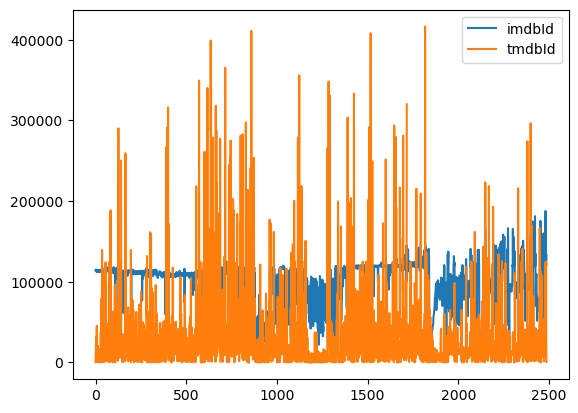

In [413]:
dflinks[['imdbId','tmdbId']].plot.line()

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

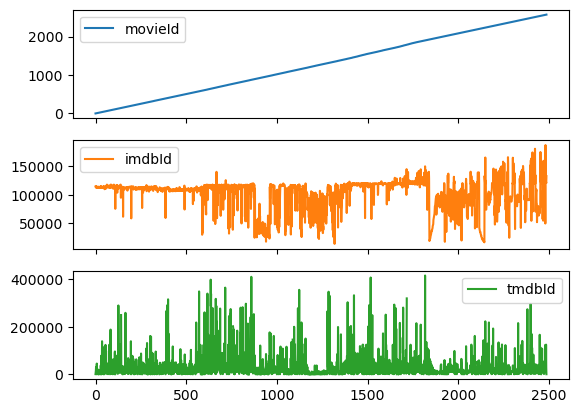

In [414]:
dflinks.plot.line(subplots=True)

<Axes: xlabel='rating'>

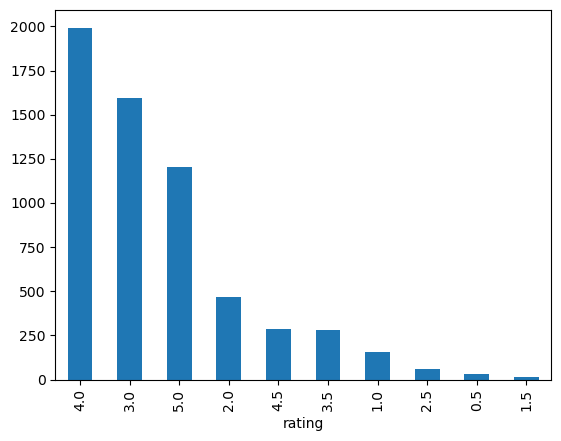

In [415]:
movie_ratings['rating'].value_counts().plot.bar()

<Axes: title={'center': 'movieId'}, xlabel='rating'>

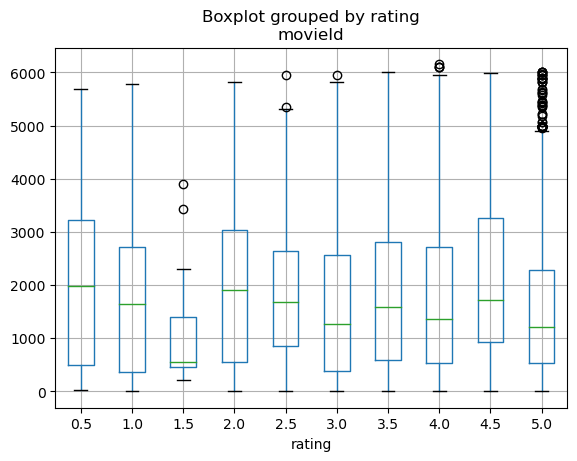

In [416]:
movie_ratings.boxplot(column=['movieId'], by='rating')

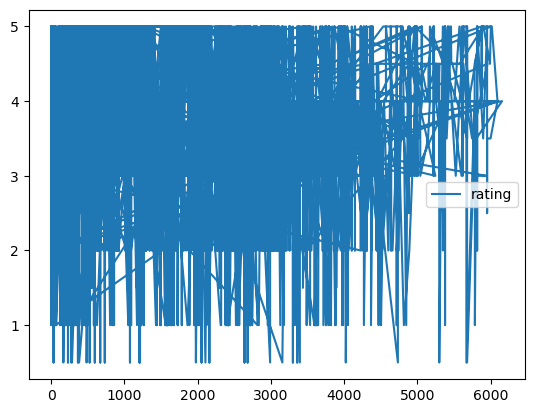

In [417]:
plt.plot(movie_ratings['movieId'], movie_ratings['rating'],label='rating')
plt.legend()
plt.show()

In [418]:
movie_ratings=movie_ratings.drop_duplicates(subset=['movieId'])
movie_ratings

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,4/2/2005 23:53,Jumanji (1995),Adventure|Children|Fantasy
6,1,29,3.5,4/2/2005 23:31,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
9,1,32,3.5,4/2/2005 23:33,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
28,1,47,3.5,4/2/2005 23:32,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
49,1,50,3.5,4/2/2005 23:29,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
6080,58,3168,4.5,4/3/2006 10:48,Easy Rider (1969),Adventure|Drama
6081,58,3257,4.0,1/24/2002 3:25,"Bodyguard, The (1992)",Drama|Romance|Thriller
6082,58,3260,4.5,4/3/2006 10:59,Howards End (1992),Drama
6083,58,3317,4.5,4/3/2006 10:34,Wonder Boys (2000),Comedy|Drama


In [419]:
movie_ratings.index

Index([   0,    6,    9,   28,   49,   70,   75,   82,   95,  109,
       ...
       6075, 6076, 6077, 6078, 6079, 6080, 6081, 6082, 6083, 6084],
      dtype='int64', length=1901)

In [420]:
start_index=28
end_index=6084
movie_ratings_dropped=movie_ratings.drop(movie_ratings.index[start_index:end_index+1])
movie_ratings_dropped

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,4/2/2005 23:53,Jumanji (1995),Adventure|Children|Fantasy
6,1,29,3.5,4/2/2005 23:31,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
9,1,32,3.5,4/2/2005 23:33,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
28,1,47,3.5,4/2/2005 23:32,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
49,1,50,3.5,4/2/2005 23:29,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
70,1,112,3.5,9/10/2004 3:09,Rumble in the Bronx (Hont faan kui) (1995),Action|Adventure|Comedy|Crime
75,1,151,4.0,9/10/2004 3:08,Rob Roy (1995),Action|Drama|Romance|War
82,1,223,4.0,4/2/2005 23:46,Clerks (1994),Comedy
95,1,253,4.0,4/2/2005 23:35,Interview with the Vampire: The Vampire Chroni...,Drama|Horror
109,1,260,4.0,4/2/2005 23:33,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi


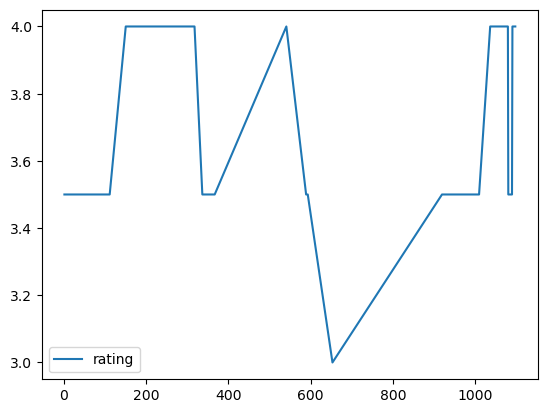

In [421]:
plt.plot(movie_ratings_dropped['movieId'], movie_ratings_dropped['rating'],label='rating')
plt.legend()
plt.show()

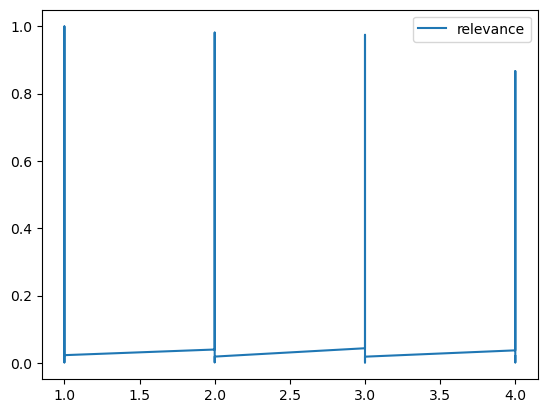

In [422]:
plt.plot(dfgenome_scores['movieId'], dfgenome_scores['relevance'],label='relevance')
plt.legend()
plt.show()

In [423]:
#from calendar import month_name

#movie_ratings_dropped['timestamp'] = pd.to_datetime(movie_ratings_dropped['timestamp'])

#movie_ratings_dropped['date'] = movie_ratings_dropped['timestamp'].dt.date
#movie_ratings_dropped.head()

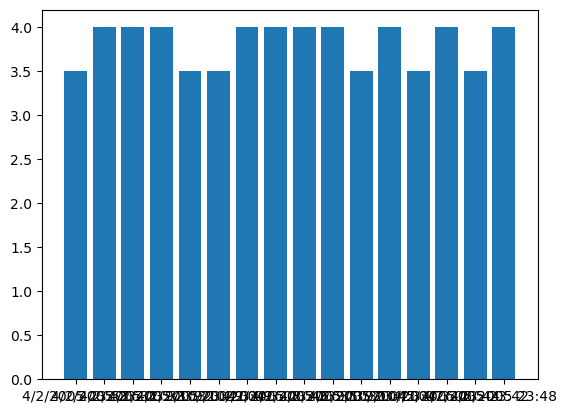

In [424]:
plt.bar(movie_ratings_dropped['timestamp'], height = movie_ratings_dropped['rating'])
plt.show()

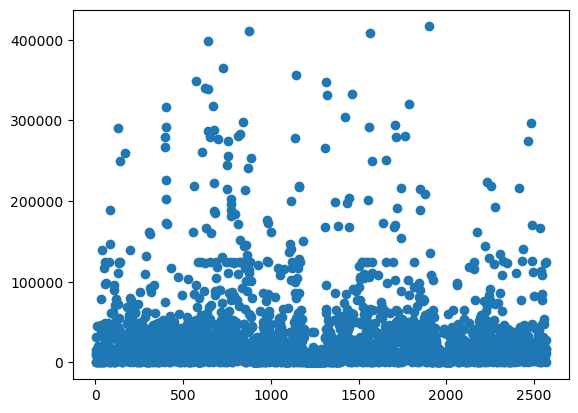

In [428]:
plt.scatter(dflinks['movieId'], dflinks['tmdbId'])
plt.show()

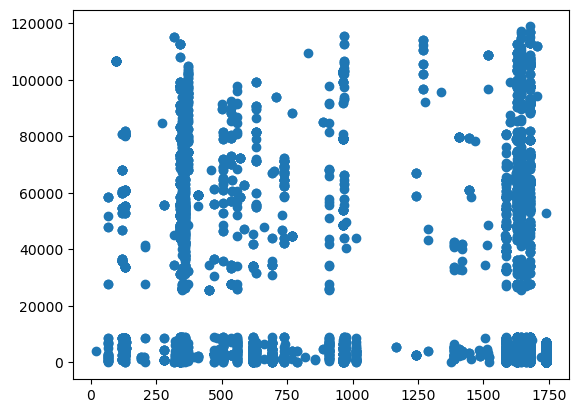

In [430]:
plt.scatter(dftags['userId'], dftags['movieId'])
plt.show()

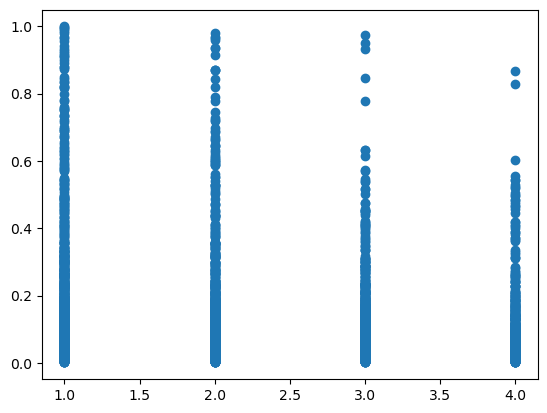

In [431]:
plt.scatter(dfgenome_scores['movieId'], dfgenome_scores['relevance'])
plt.show()

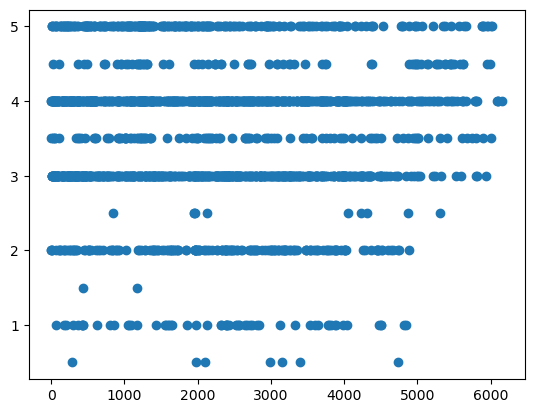

In [435]:
plt.scatter(movie_ratings['movieId'], movie_ratings['rating'])
plt.show()

In [436]:
z = np.polyfit(dflinks['movieId'], dflinks['tmdbId'], 1)
p = np.poly1d(z)


plt.scatter(dflinks['movieId'], dflinks['tmdbId'])
plt.plot(dflinks['movieId'], p(dflinks['movieId']))
plt.show()

LinAlgError: SVD did not converge in Linear Least Squares

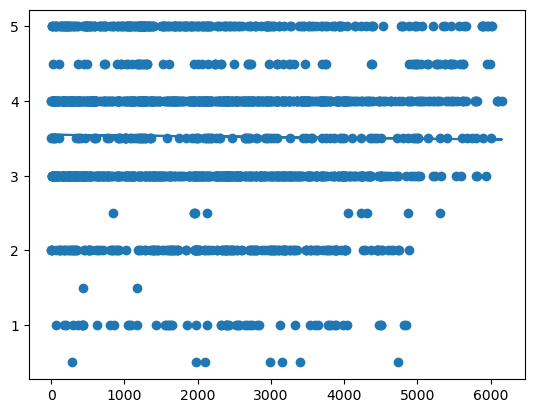

In [438]:
z = np.polyfit(movie_ratings['movieId'], movie_ratings['rating'], 1)
p = np.poly1d(z)


plt.scatter(movie_ratings['movieId'], movie_ratings['rating'])
plt.plot(movie_ratings['movieId'], p(movie_ratings['movieId']))
plt.show()

In [444]:
movie_ratings_dropped=movie_ratings_dropped.sort_values(by='rating')
movie_ratings_dropped

,userId,movieId,rating,timestamp,title,genres
291,1,653,3.0,9/10/2004 3:08,Dragonheart (1996),Action|Adventure|Fantasy
0,1,2,3.5,4/2/2005 23:53,Jumanji (1995),Adventure|Children|Fantasy
342,1,1089,3.5,4/2/2005 23:31,Reservoir Dogs (1992),Crime|Mystery|Thriller
334,1,1080,3.5,4/2/2005 23:42,Monty Python's Life of Brian (1979),Comedy
314,1,1009,3.5,4/2/2005 23:53,Escape to Witch Mountain (1975),Adventure|Children|Fantasy
303,1,924,3.5,9/10/2004 3:06,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi
297,1,919,3.5,9/10/2004 3:07,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical
262,1,593,3.5,4/2/2005 23:31,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
238,1,589,3.5,4/2/2005 23:45,Terminator 2: Judgment Day (1991),Action|Sci-Fi
208,1,367,3.5,4/2/2005 23:53,"Mask, The (1994)",Action|Comedy|Crime|Fantasy


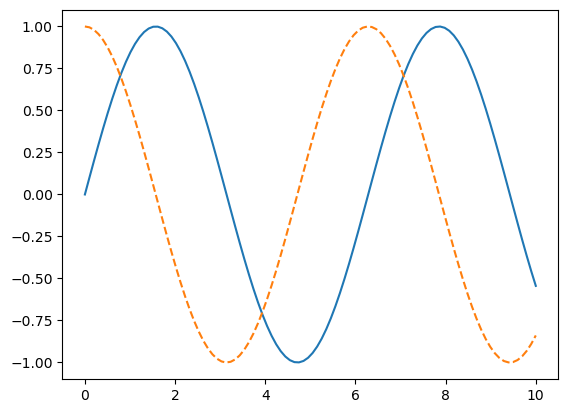

In [446]:
x1 = np.linspace(0, 10, 100)


# create a plot figure
fig = plt.figure()

plt.plot(x1, np.sin(x1), '-')
plt.plot(x1, np.cos(x1), '--');

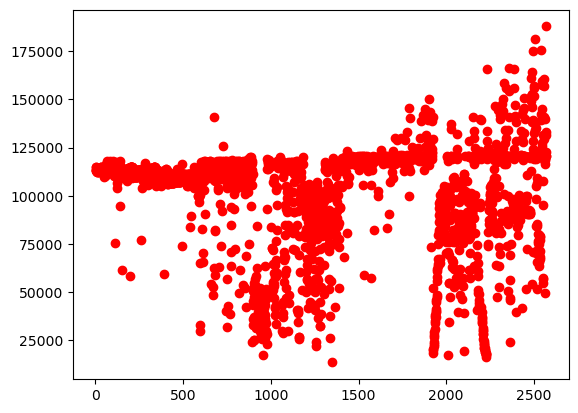

In [448]:
plt.plot(dflinks['movieId'], dflinks['imdbId'], 'ro')

plt.show()

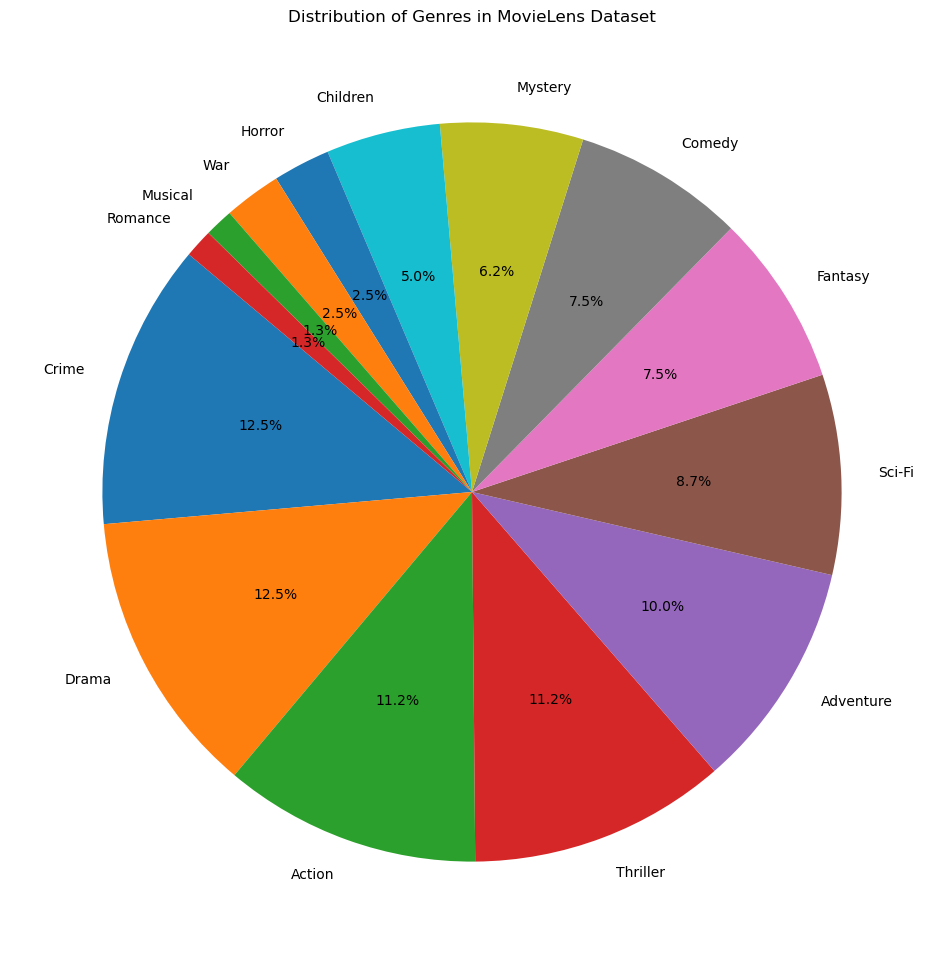

In [462]:
genres_split = movie_ratings_dropped['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre')

# Create a DataFrame with movieID and genre
genres_df = pd.DataFrame({'movieId': genres_split.index, 'genre': genres_split.values})

# Count the occurrences of each genre
genre_counts = genres_df['genre'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(12, 12))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Genres in MovieLens Dataset')
plt.show()

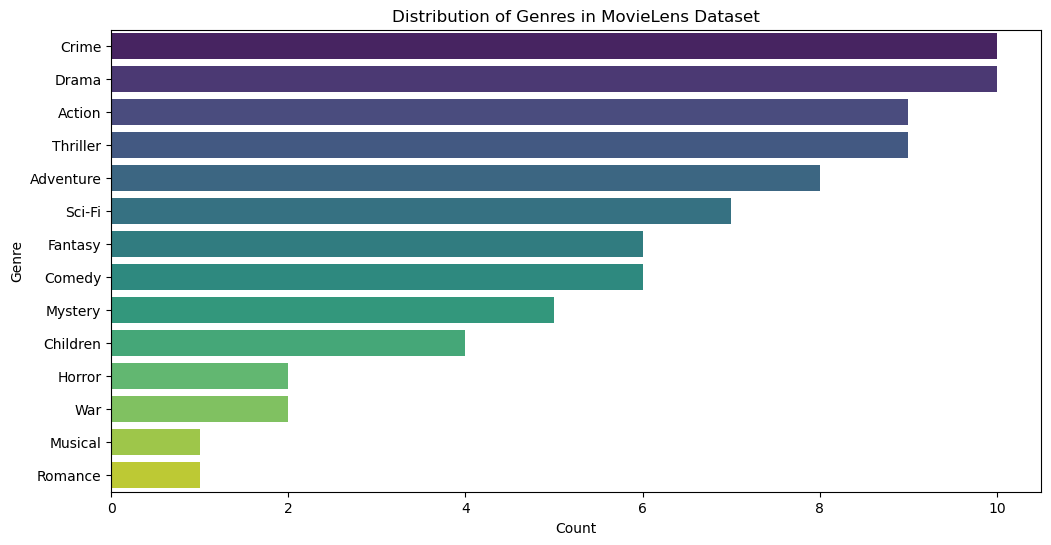

In [465]:
#count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=genres_df, y='genre', order=genres_df['genre'].value_counts().index, palette='viridis')
plt.title('Distribution of Genres in MovieLens Dataset')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


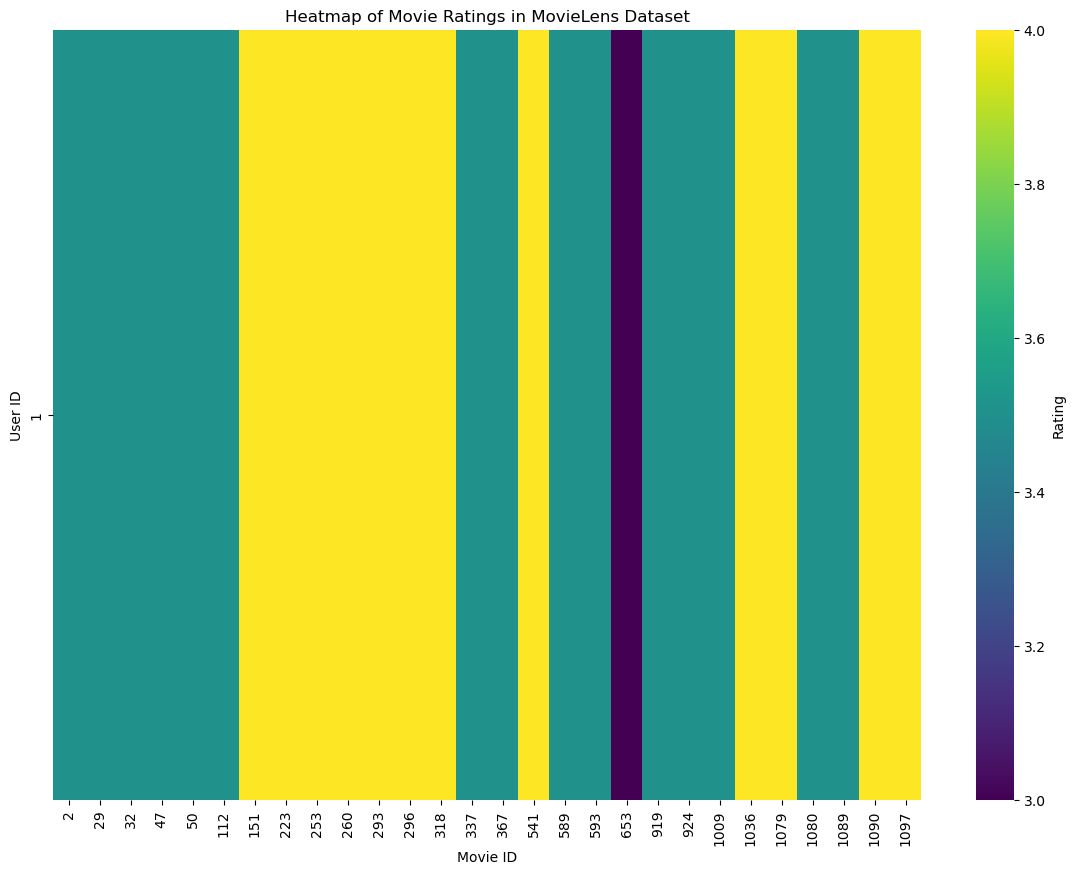

In [476]:
# box plot


# Pivot the DataFrame to create a matrix of movie ratings
ratings_matrix = movie_ratings_dropped.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)

# Plotting a heatmap of movie ratings
plt.figure(figsize=(14, 10))
sns.heatmap(ratings_matrix, cmap='viridis', cbar_kws={'label': 'Rating'})
plt.title('Heatmap of Movie Ratings in MovieLens Dataset')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()

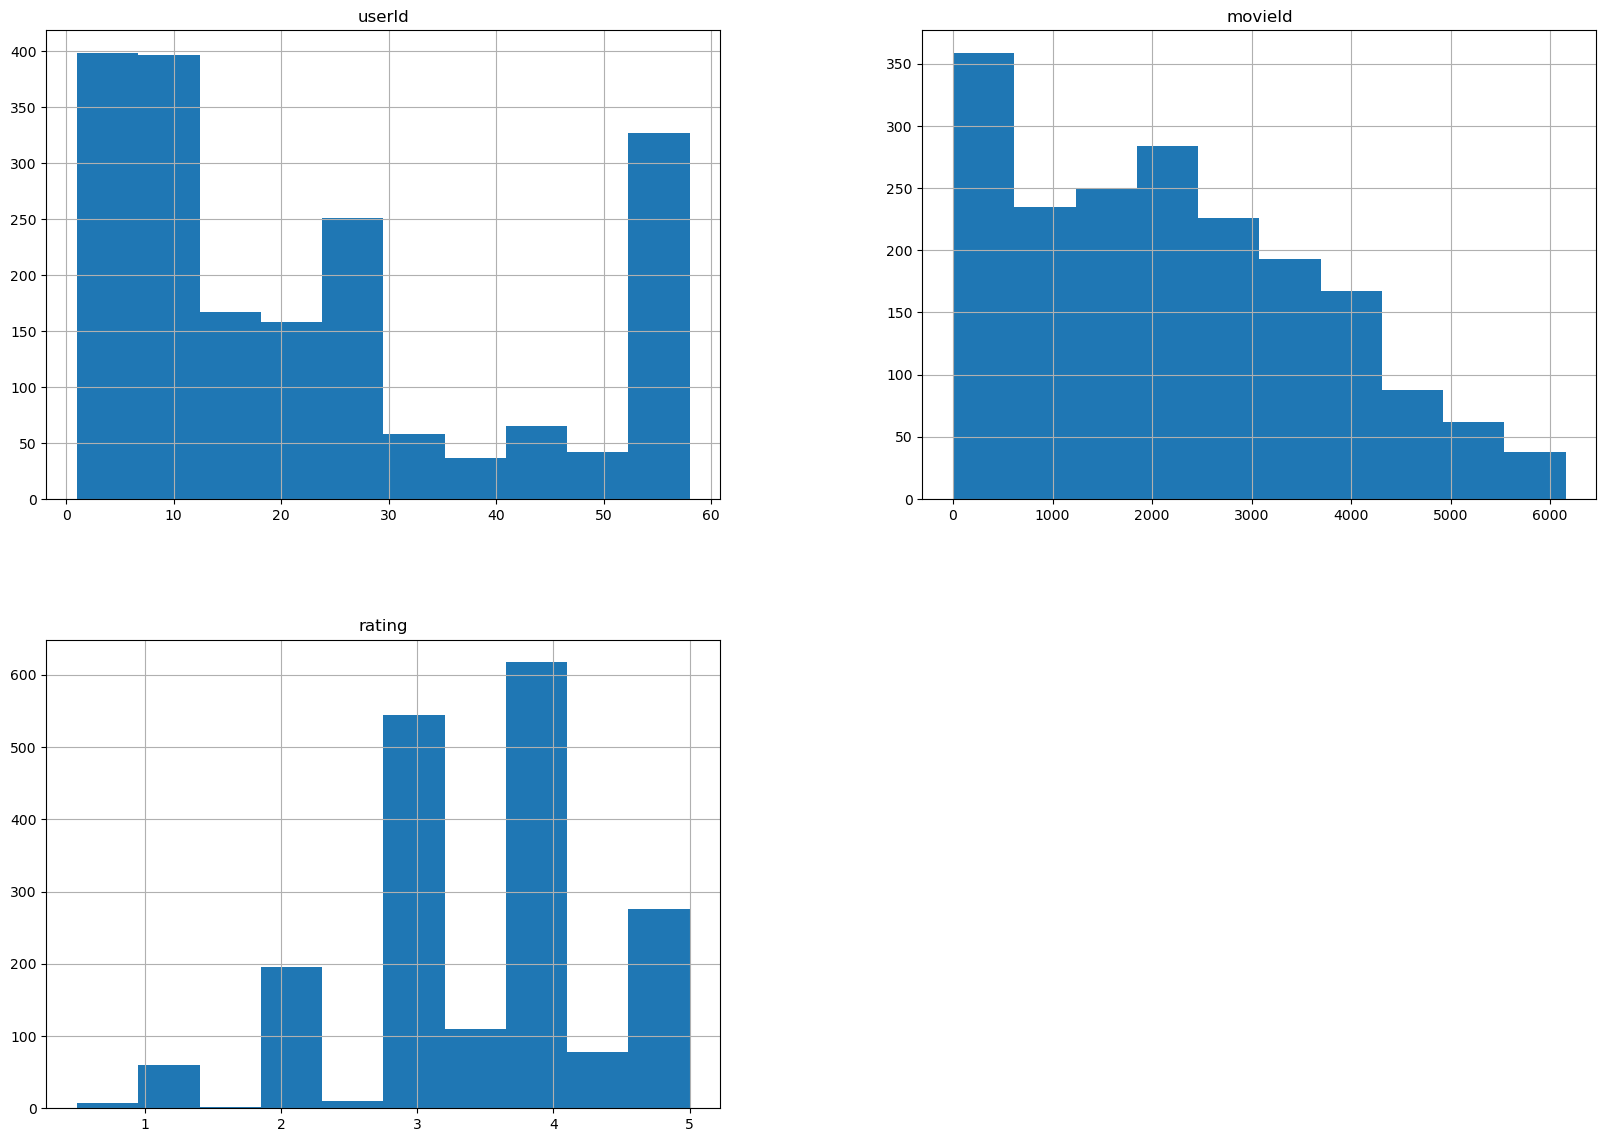

In [477]:
movie_ratings.hist(figsize=(20,14))
plt.show()

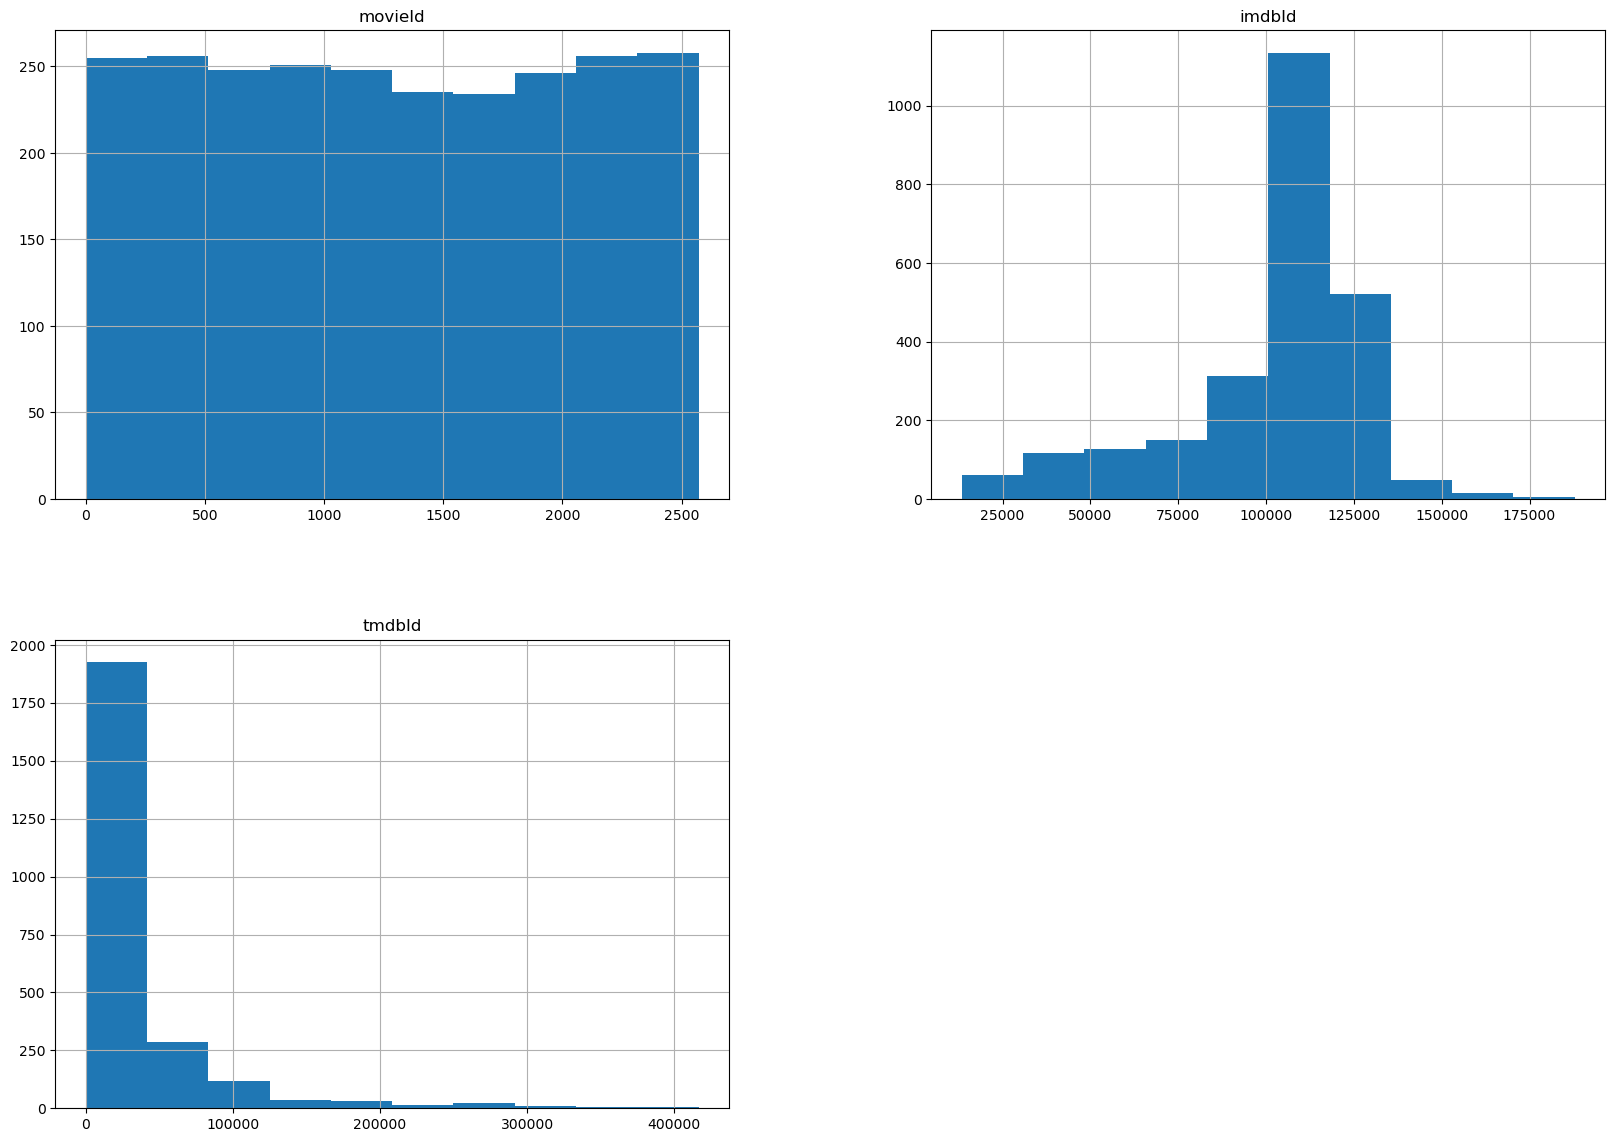

In [478]:
dflinks.hist(figsize=(20,14))
plt.show()

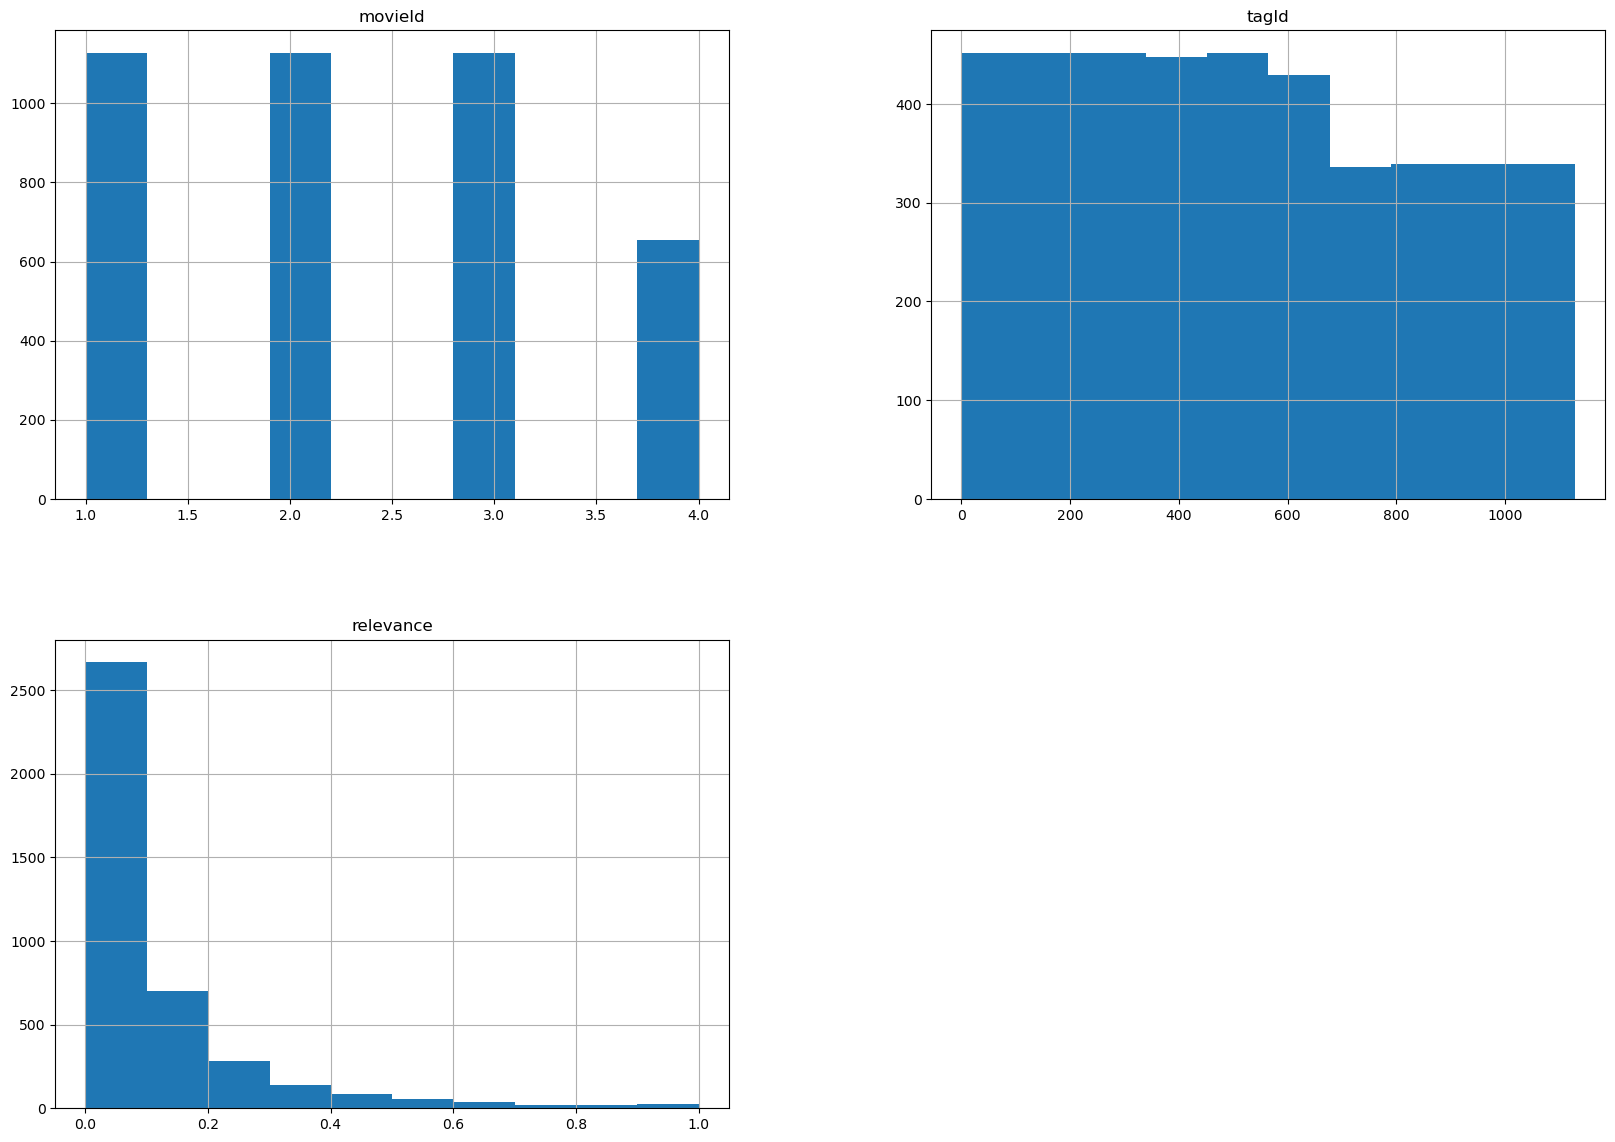

In [479]:
dfgenome_scores.hist(figsize=(20,14))
plt.show()

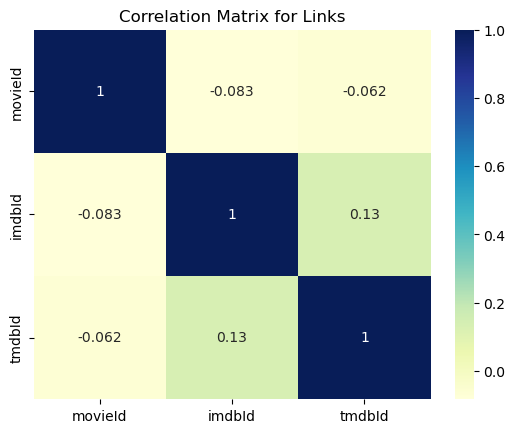

In [548]:
sns.heatmap(dflinks.corr(),cmap='YlGnBu',annot=True)
plt.title(f'Correlation Matrix for Links', fontsize=12)
plt.show()

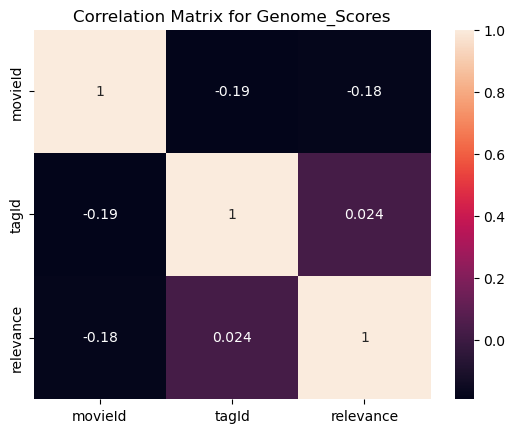

In [546]:
sns.heatmap(dfgenome_scores.corr(),cmap='rocket',annot=True)
plt.title(f'Correlation Matrix for Genome_Scores', fontsize=12)
plt.show()

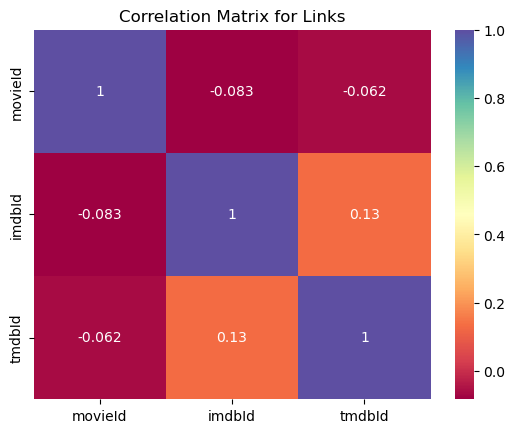

In [547]:
sns.heatmap(dflinks.corr(),cmap='Spectral',annot=True)
plt.title(f'Correlation Matrix for Links', fontsize=12)
plt.show()

In [503]:
dflinks.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


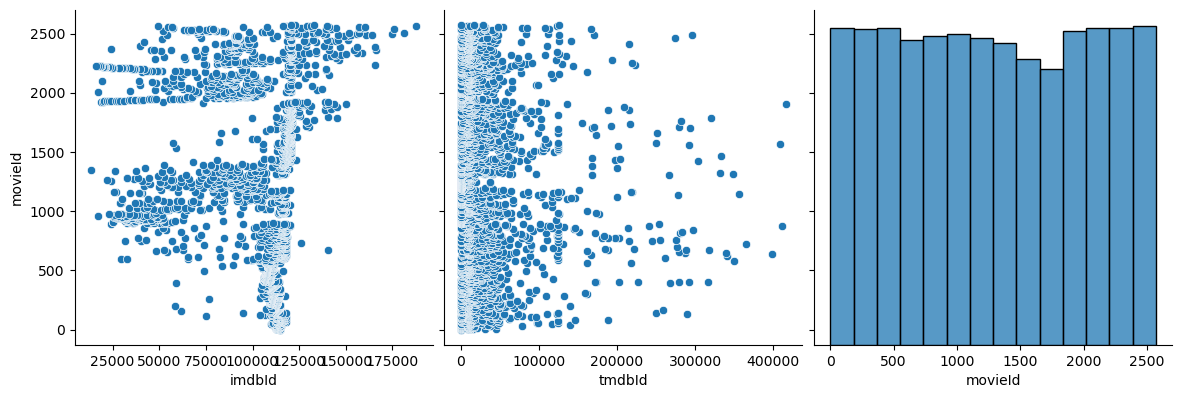

In [505]:
sns.pairplot(dflinks,x_vars=['imdbId','tmdbId','movieId'],y_vars='movieId',height=4,aspect=1,kind='scatter')
plt.show()



In [528]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# genome_scores.csv has 11709768 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('genome_scores.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'genome_scores.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 3 columns


In [538]:
import matplotlib.pyplot as plt
import pandas as pd

def plotCorrelationMatrix(df,title):
    df = df.dropna() # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {title}', fontsize=15)
    plt.show()

# Example usage:
# Assuming df is your DataFrame and 'MyDataFrame' is the name you want in the title
# plotCorrelationMatrix(df, graphWidth=8, title='MyDataFrame')


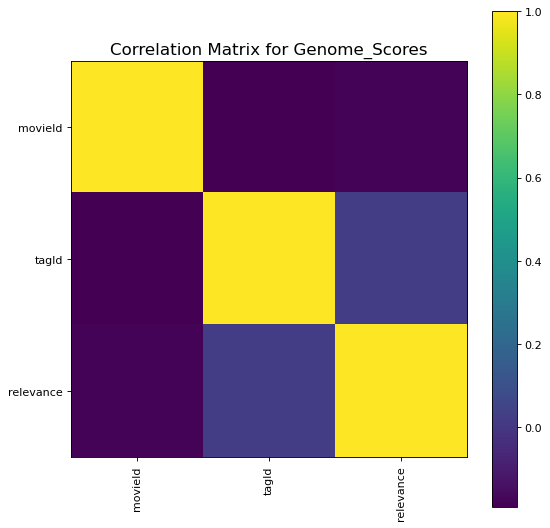

In [537]:
dfgenome_scores.corr()

,movieId,tagId,relevance
movieId,1.000000,-0.191689,-0.178889
tagId,-0.191689,1.000000,0.024213
relevance,-0.178889,0.024213,1.000000
